# Ex 6번

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


여기서 굳이 sentences로 해서 담는 이유는 ... word_list는 왜 나와...? 그냥 그런 기능이 있는거야?

In [2]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


위의 결과로 단어 10개짜리의 작은 딕셔너리가 만들어졌다. 
텍스트 데이터를 숫자로 바꾸려면 위의 딕셔너리를 {텍스트:인덱스} 구조로 만들어야한다. 




In [3]:
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


In [5]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


In [6]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


반대로, encode된 벡터를 decode하여 다시 원래 텍스트 데이터로 복구할 수도 있습니다.

In [7]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [8]:
# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


정의가 된 함수들은 이후에도 반복해서 사용할 수 있다. 

# Embedding layer의 등장
 - Tensorflow, Pytorch등의 딥러닝 프레임워크들은 의미 벡터 파라미터를 구현한 Embedding layer를 제공한다. 

In [9]:
# 아래 코드는 그대로 실행하시면 에러가 발생할 것입니다. 

import numpy as np
import tensorflow as tf
import os
from konlpy.tag import Mecab
from collections import Counter


def get_decoded_sentence(raw_sentence,index_to_word):
    return ' '.join(index_to_word[idx] if idx in index_to_word else "<UNK>" for idx in raw_sentence[1:])

def get_decoded_sentences(raw_sens,index_to_word):
    return [get_decoded_sentence(sentence,index_to_word) for sentence in raw_sens]

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print(x_train[0])
print("라벨 : ",y_train[0])


#제공되는 딕셔너리를 저장합니다.
word_to_index = imdb.get_word_index()
#제공된 딕셔너리를 이용해 idx에서 word로 변환하는 딕셔너리를 정의합니다.
index_to_word = {index:word for word,index in word_to_index.items()}
print("1번 인덱스가 뭔가요 : ",index_to_word[1])
print("the는 몇번 인덱스인가요 : ",word_to_index['the'])

print(get_decoded_sentence(x_train[0],index_to_word))


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨 :  1
1번 인덱스가 뭔가요 :  the
the는 몇번 인덱스인가요 :  1
as you with o

In [10]:
#매핑된 인덱스를 3씩 올려줍니다.
word_to_index = {k:(v+3) for k,v in word_to_index.items()}
#사전에 정의된 인덱스는 따로 처리!
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2
word_to_index["<UNUSED>"] = 3
#재정의된 word_to_index에 맞게 재정의해줍니다.
index_to_word = {index:word for word,index in word_to_index.items()}

In [11]:
#보정된 딕셔너리로 번역된 문장입니다.
print(get_decoded_sentence(x_train[0],index_to_word))

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

In [12]:


vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 위 그림과 같이 4차원의 워드 벡터를 가정합니다. 

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')

raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)
output = embedding(raw_inputs)
print(output)

[[   1   13  235 5396    0]
 [   1   13 1900 6803    0]
 [   1  150   13  235  654]]
tf.Tensor(
[[[-0.04260198  0.02759534 -0.02231408 -0.03350891]
  [ 0.02812756 -0.04048174  0.01492769  0.00747962]
  [-0.00561512 -0.0238874   0.03723601  0.00479044]
  [ 0.03613876 -0.00217115  0.02994775 -0.0298324 ]
  [ 0.0066942   0.02262983 -0.04871633  0.03764108]]

 [[-0.04260198  0.02759534 -0.02231408 -0.03350891]
  [ 0.02812756 -0.04048174  0.01492769  0.00747962]
  [ 0.03809508  0.04423609 -0.02055256 -0.0400108 ]
  [-0.00977837 -0.00897509 -0.01505147 -0.0397712 ]
  [ 0.0066942   0.02262983 -0.04871633  0.03764108]]

 [[-0.04260198  0.02759534 -0.02231408 -0.03350891]
  [-0.01992855  0.01148657 -0.01576657 -0.01753913]
  [ 0.02812756 -0.04048174  0.01492769  0.00747962]
  [-0.00561512 -0.0238874   0.03723601  0.00479044]
  [-0.04815475 -0.02267376 -0.04592284 -0.02365329]]], shape=(3, 5, 4), dtype=float32)


In [13]:

total_data_text = list(x_train)+list(x_test)
#문장의 길이를 리스트로 저장한뒤 numpy함수를 사용하기 위해 numpy 리스트로 변환합니다.
num_tokens = [len(token) for token in total_data_text]
num_tokens = np.array(num_tokens)

print("문장 길이의 평균 :", np.mean(num_tokens))
print("문장 길이의 최대 :", np.max(num_tokens))
print("문장 길이의 표준편차 :", np.std(num_tokens))
#임시로 maxlen을 평균 + 2 * 표준편차라고 한다면,
max_tokens = np.mean(num_tokens)+2*np.std(num_tokens)
#실수형 데이터를 정수로 바꿔줍니다.
maxlen = int(max_tokens)
print("전체 문장의 {}%가 maxlen값 이내에 포함됩니다.".format(np.sum(num_tokens<max_tokens)/len(num_tokens)))

문장 길이의 평균 : 234.75892
문장 길이의 최대 : 2494
문장 길이의 표준편차 : 172.91149458735703
전체 문장의 0.94536%가 maxlen값 이내에 포함됩니다.


In [14]:
#얻은 maxlen을 이용해 문장의 길이를 통일시킵니다.
print(x_train.shape)
#padding을 추가하는 위치는 post와 pre가 있습니다.
pre_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value = word_to_index["<PAD>"],
                                                        padding='pre',
                                                       maxlen=maxlen)
pre_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                        value = word_to_index["<PAD>"],
                                                        padding='pre',
                                                       maxlen=maxlen)
post_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value = word_to_index["<PAD>"],
                                                        padding='post',
                                                       maxlen=maxlen)
post_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                        value = word_to_index["<PAD>"],
                                                        padding='post',
                                                       maxlen=maxlen)
print(pre_x_train.shape)
print(pre_x_train[0])

(25000,)
(25000, 580)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0

In [15]:
#모델 훈련을 위해 데이터를 나눠줍니다.
#검증데이터
pre_x_val = pre_x_train[:10000]
post_x_val = post_x_train[:10000]
y_val = y_train[:10000]
#학습데이터
pre_partial_x_train = pre_x_train[10000:]
post_partial_x_train = post_x_train[10000:]
y_train = y_train[10000:]

In [16]:
vocab_size = 10000
word_vector_dim = 16
#데이터에 따라 모델을 각각 준비합니다.
pre_model = tf.keras.Sequential()
pre_model.add(tf.keras.layers.Embedding(vocab_size,word_vector_dim,input_shape=(None,)))
pre_model.add(tf.keras.layers.LSTM(8))
pre_model.add(tf.keras.layers.Dense(8,activation='relu'))
pre_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))#출력값은 0,1 둘 중 하나면 됩니다

post_model = tf.keras.Sequential()
post_model.add(tf.keras.layers.Embedding(vocab_size,word_vector_dim,input_shape=(None,)))
post_model.add(tf.keras.layers.LSTM(8))
post_model.add(tf.keras.layers.Dense(8,activation='relu'))
post_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


In [17]:
epochs = 10

In [18]:
pre_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

pre_history = pre_model.fit(pre_partial_x_train,
                           y_train,
                           epochs=epochs,
                           batch_size = 512,
                           validation_data=(pre_x_val,y_val),
                           verbose = 1)

Epoch 1/10
30/30 [==============================] - 5s 48ms/step - loss: 0.6919 - accuracy: 0.5346 - val_loss: 0.6894 - val_accuracy: 0.6063
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6805 - accuracy: 0.6629 - val_loss: 0.6696 - val_accuracy: 0.6593
Epoch 3/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6125 - accuracy: 0.7493 - val_loss: 0.5390 - val_accuracy: 0.8081
Epoch 4/10
30/30 [==============================] - 1s 29ms/step - loss: 0.4845 - accuracy: 0.8471 - val_loss: 0.4713 - val_accuracy: 0.8350
Epoch 5/10
30/30 [==============================] - 1s 29ms/step - loss: 0.3892 - accuracy: 0.8862 - val_loss: 0.4346 - val_accuracy: 0.8373
Epoch 6/10
30/30 [==============================] - 1s 29ms/step - loss: 0.3217 - accuracy: 0.9065 - val_loss: 0.3739 - val_accuracy: 0.8575
Epoch 7/10
30/30 [==============================] - 1s 29ms/step - loss: 0.2670 - accuracy: 0.9231 - val_loss: 0.3649 - val_accuracy: 0.8532
Epoch 8/10
30

In [19]:
post_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

post_history = post_model.fit(post_partial_x_train,
                           y_train,
                           epochs=epochs,
                           batch_size = 512,
                           validation_data=(post_x_val,y_val),
                           verbose = 1)

Epoch 1/10
30/30 [==============================] - 3s 42ms/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6928 - accuracy: 0.5133 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6924 - accuracy: 0.5079 - val_loss: 0.6929 - val_accuracy: 0.5011
Epoch 4/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6909 - accuracy: 0.5083 - val_loss: 0.6918 - val_accuracy: 0.5024
Epoch 5/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6854 - accuracy: 0.5229 - val_loss: 0.6882 - val_accuracy: 0.5079
Epoch 6/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6807 - accuracy: 0.5319 - val_loss: 0.6866 - val_accuracy: 0.5109
Epoch 7/10
30/30 [==============================] - 1s 29ms/step - loss: 0.6695 - accuracy: 0.5321 - val_loss: 0.6871 - val_accuracy: 0.5106
Epoch 8/10
30

In [20]:
pre_loss,pre_acc = pre_model.evaluate(pre_x_test,  y_test, verbose=2)
post_loss,post_acc = post_model.evaluate(post_x_test,  y_test, verbose=2)
print("padding의 위치에 따른 정확도 비교 -> pre : {}% post : {}%".format(int(pre_acc*100),
                                                            int(post_acc*100)))

782/782 - 5s - loss: 0.4183 - accuracy: 0.8392
782/782 - 5s - loss: 0.6892 - accuracy: 0.5105
padding의 위치에 따른 정확도 비교 -> pre : 83% post : 51%


In [21]:
#학습한 임베딩 파라미터를 파일에 저장합니다.
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path,'w')
#몇개의 벡터를 얼마 사이즈로 쓸 것인지 타이틀로 기록합니다.
f.write('{} {}\n'.format(vocab_size-4,word_vector_dim))

vectors = pre_model.get_weights()[0]
# 첫 특수문자 4개를 제외하고 모두 파일에 기록합니다.
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i],' '.join(map(str,list(vectors[i,:])))))


f.close()

In [22]:
from gensim.models.keyedvectors import Word2VecKeyedVectors as w2v
#파일로 된 워드 임베딩을 불러옵니다.
word_vectors = w2v.load_word2vec_format(word2vec_file_path,binary = False)
#computer의 워드 벡터를 확인합시다.
vector = word_vectors['computer']
vector

array([ 0.05342961,  0.04084945,  0.07172848,  0.03279585, -0.00883288,
        0.06762367,  0.0192168 , -0.01535941,  0.03656299,  0.00533588,
        0.02511191,  0.03816698, -0.07383454, -0.00558129,  0.01663273,
        0.01806433], dtype=float32)

In [23]:
word_vectors.similar_by_word("love")

[('vulnerable', 0.9564344882965088),
 ('blake', 0.9476271271705627),
 ('9', 0.9458087682723999),
 ('owns', 0.9451361894607544),
 ('country', 0.9450594782829285),
 ('thanks', 0.9423068165779114),
 ('ages', 0.9414801001548767),
 ('7', 0.9391072988510132),
 ('amazing', 0.9383803009986877),
 ('lived', 0.9381442666053772)]

In [24]:
word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = w2v.load_word2vec_format(word2vec_path,binary = True,limit = 1000000)
vector = word2vec['computer']
#300차원의 워드 벡터입니다.
print(vector.shape)

BadGzipFile: Not a gzipped file (b'6 ')

In [25]:
word2vec.similar_by_word("love")

NameError: name 'word2vec' is not defined

In [26]:
vocab_size = 10000
word_vector_dim = 300
embedding_matrix = np.random.rand(vocab_size,word_vector_dim)
#단어사전에 존재하는 단어별 워드 벡터를 복사합니다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

NameError: name 'word2vec' is not defined

In [27]:
from tensorflow.keras.initializers import Constant

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),
                                 input_length=maxlen, 
                                 trainable=True))
model.add(tf.keras.layers.LSTM(8))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10

history = model.fit(pre_partial_x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(pre_x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 4s 71ms/step - loss: 0.6913 - accuracy: 0.5301 - val_loss: 0.6872 - val_accuracy: 0.5941
Epoch 2/10
30/30 [==============================] - 2s 57ms/step - loss: 0.6704 - accuracy: 0.6219 - val_loss: 0.6431 - val_accuracy: 0.6684
Epoch 3/10
30/30 [==============================] - 2s 67ms/step - loss: 0.6212 - accuracy: 0.7241 - val_loss: 0.6005 - val_accuracy: 0.7393
Epoch 4/10
30/30 [==============================] - 2s 57ms/step - loss: 0.5695 - accuracy: 0.7843 - val_loss: 0.5793 - val_accuracy: 0.7390
Epoch 5/10
30/30 [==============================] - 2s 57ms/step - loss: 0.5570 - accuracy: 0.7851 - val_loss: 0.6117 - val_accuracy: 0.6735
Epoch 6/10
30/30 [==============================] - 2s 57ms/step - loss: 0.6710 - accuracy: 0.5810 - val_loss: 0.6507 - val_accuracy: 0.6151
Epoch 7/10
30/30 [==============================] - 2s 57ms/step - loss: 0.5564 - accuracy: 0.7536 - val_loss: 0.5887 - val_accuracy: 0.8044
Epoch 8/10
30

In [30]:
model_loss,model_acc = model.evaluate(pre_x_test,y_test,verbose=2)
print("모델의 정확도는 {}% 입니다.".format(int(model_acc*100)))

782/782 - 6s - loss: 0.4806 - accuracy: 0.8320
모델의 정확도는 83% 입니다.


주의해야 할 점이 있습니다. 

Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야 합니다. 

raw_inputs의 3개 벡터의 길이는 각각 4, 4, 5입니다.

Tensorflow에서는 tf.keras.preprocessing.sequence.pad_sequences라는 

편리한 함수를 통해 문장 벡터 뒤에 패딩(<PAD>)을 추가하여 길이를 일정하게 맞춰주는 기능을 제공합니다.
    
    
<오류 발생>
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
output = embedding(raw_inputs)
print(output)
    
<오류 수정>
    
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)

In [31]:
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 가정합니다.

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[-0.0433997  -0.03496414  0.02270115  0.03573449]
  [-0.04805122 -0.04611958 -0.00368042 -0.02210575]
  [-0.00956595 -0.0129882  -0.01961517  0.02310673]
  [ 0.00462831 -0.01772109 -0.01295043 -0.00085523]
  [-0.00787749  0.00356957  0.02474667 -0.03136282]]

 [[-0.0433997  -0.03496414  0.02270115  0.03573449]
  [-0.04805122 -0.04611958 -0.00368042 -0.02210575]
  [-0.049557   -0.00342374  0.02751136  0.03803409]
  [ 0.0317567  -0.03994334  0.03510097 -0.02485411]
  [-0.00787749  0.00356957  0.02474667 -0.03136282]]

 [[-0.0433997  -0.03496414  0.02270115  0.03573449]
  [ 0.00115754 -0.01358572  0.04611523 -0.04560394]
  [-0.04805122 -0.04611958 -0.00368042 -0.02210575]
  [-0.00956595 -0.0129882  -0.01961517  0.02310673]
  [-0.01906455 -0.02397597 -0.0219898   0.01834418]]], shape=(3, 5, 4), dtype=float32)


Outout에서의 shape(3, 5, 4)
= (입력 문장의 개수, 입력문장의 최대 길이, 워드 벡터의 차원수)

In [32]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 416       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


In [33]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [34]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


1-D CNN과 RNN을 섞어 쓸 수도 있다. 
FFN(Feed Forward Newtwork)만으로 구성할 수도 있다. 
Transformer layer

# IMDB 영화리뷰 감성분석 (1) IMDB 데이터셋 분석



In [35]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

훈련 샘플 개수: 25000, 테스트 개수: 25000


In [36]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


In [37]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

the
1


In [38]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

<BOS>
4
the


In [39]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

pad_sequences를 통해 데이터셋 상의 문장의 길이를 통일하는 것을 잊어서는 안됩니다.
문장 최대 길이 maxlen의 값 설정도 전체 모델 성능에 영향을 미치게 됩니다. 
이 길이도 적절한 값을 찾기 위해서는 전체 데이터셋의 분포를 확인해 보는 것이 좋습니다.

In [40]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


In [41]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


Q9. RNN 활용 시 pad_sequences의 padding 방식은 'post'와 'pre' 중 어느 것이 유리할까요? 
그 이유는 무엇일까요?

RNN은 입력데이터가 순차적으로 처리되어, 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 미치게 됩니다. 그러므로 마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적입니다. 따라서 'pre'가 훨씬 유리하며, 10% 이상의 테스트 성능 차이를 보이게 됩니다.

----------------------------------------------

In [42]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)



['i', 'feel', 'hungry']
{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


In [43]:
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [44]:
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# raw_inputs의 문장의 길이를 PAD를 이용하여 동일하게 만들기
raw_inputs = keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)

# Embedding

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드벡터를 가정

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index))
raw_inputs = keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)

[[   1   13  235 5396    0]
 [   1   13 1900 6803    0]
 [   1  150   13  235  654]]
tf.Tensor(
[[[ 0.02666638  0.02103719 -0.02463411 -0.04781009]
  [-0.0409029  -0.01939142  0.00429207  0.01914128]
  [ 0.03337837  0.01384049 -0.02245493 -0.02187165]
  [-0.01379798  0.02138275 -0.04089691 -0.03048711]
  [-0.04500675  0.00283849  0.01205711 -0.04424006]]

 [[ 0.02666638  0.02103719 -0.02463411 -0.04781009]
  [-0.0409029  -0.01939142  0.00429207  0.01914128]
  [-0.03922782  0.0196254  -0.0036276  -0.03954406]
  [ 0.00441999  0.02710173  0.02851266 -0.04721003]
  [-0.04500675  0.00283849  0.01205711 -0.04424006]]

 [[ 0.02666638  0.02103719 -0.02463411 -0.04781009]
  [ 0.02832141  0.03577873  0.04136609 -0.04015522]
  [-0.0409029  -0.01939142  0.00429207  0.01914128]
  [ 0.03337837  0.01384049 -0.02245493 -0.02187165]
  [-0.02929403  0.04192949  0.03657709 -0.00633306]]], shape=(3, 5, 4), dtype=float32)


/tmp/ipykernel_3962/311634172.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index))


In [46]:
# raw_inputs의 문장의 길이를 PAD를 이용하여 동일하게 만들기

raw_inputs = keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)

# Embedding
import numpy as np
import tensorflow as tf

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


# 딥러닝 모델 설계와 훈련
## RNN 모델을 직접 설계하기

In [47]:
import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4  

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')

raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)


output = embedding(raw_inputs)
print(output)


tf.Tensor(
[[[ 0.00054538  0.0374161   0.04394401 -0.00261586]
  [ 0.03477428 -0.00557065 -0.02278692  0.03299156]
  [ 0.0493491   0.02939073 -0.01579206  0.01641895]
  [-0.03033551  0.03495378  0.01021139 -0.00638813]
  [-0.03000807  0.04632372  0.01013935 -0.02789087]]

 [[ 0.00054538  0.0374161   0.04394401 -0.00261586]
  [ 0.03477428 -0.00557065 -0.02278692  0.03299156]
  [-0.04570956  0.02845628  0.03783857  0.04381308]
  [-0.04578506  0.04788288 -0.0158416   0.02870668]
  [-0.03000807  0.04632372  0.01013935 -0.02789087]]

 [[ 0.00054538  0.0374161   0.04394401 -0.00261586]
  [ 0.04225749 -0.02801248  0.03578106 -0.01657528]
  [ 0.03477428 -0.00557065 -0.02278692  0.03299156]
  [ 0.0493491   0.02939073 -0.01579206  0.01641895]
  [ 0.04820801  0.00397642 -0.04753726 -0.04543849]]], shape=(3, 5, 4), dtype=float32)


In [48]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종


model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 4)           40        
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 416       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


In [49]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 4)           40        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 16)          464       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 4)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [51]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)
imdb = keras.datasets.imdb



2.6.0


In [52]:
# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

# 데이터 확인
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))

# word_index 가져오기
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력 
print(word_to_index['the'])  # 1 이 출력

# decoding
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

훈련 샘플 개수: 25000, 테스트 개수: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
the

In [53]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))


문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


In [54]:
#수정

word_to_index = {k:(v+3) for  k,v in word_to_index.items()}
word_to_index ["<PAD>"] = 0
word_to_index ["<BOS>"] = 1
word_to_index ["<UNK>"] = 2
word_to_index ["<UNUSED>"] = 3
index_to_word = {index:word for word, index in word_to_index.items()}

In [55]:
# padding
x_train = keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


In [56]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [57]:
vocab_size = 10000
word_vector_dim = 16

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [58]:


# 모델 학습
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=20

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


Epoch 1/20
30/30 [==============================] - 1s 11ms/step - loss: 0.6905 - accuracy: 0.5521 - val_loss: 0.6864 - val_accuracy: 0.6859
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.6790 - accuracy: 0.7065 - val_loss: 0.6705 - val_accuracy: 0.7591
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.6542 - accuracy: 0.7900 - val_loss: 0.6402 - val_accuracy: 0.7864
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.6120 - accuracy: 0.8197 - val_loss: 0.5945 - val_accuracy: 0.8036
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.5537 - accuracy: 0.8413 - val_loss: 0.5390 - val_accuracy: 0.8176
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4876 - accuracy: 0.8569 - val_loss: 0.4828 - val_accuracy: 0.8230
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.4248 - accuracy: 0.8676 - val_loss: 0.4368 - val_accuracy: 0.8318
Epoch 8/20
30/30 [=

In [59]:
#모델 평가하기

results = model.evaluate(x_test, y_test, verbose=2)

print(results)

782/782 - 1s - loss: 0.3593 - accuracy: 0.8464
[0.35932159423828125, 0.8464400172233582]


In [60]:
history_dict = history.history
print(history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


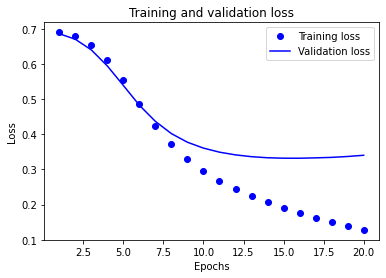

In [61]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

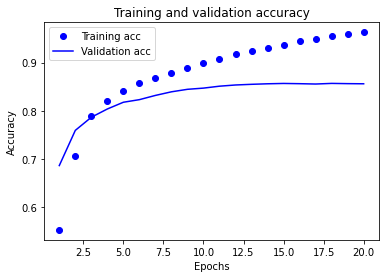

In [62]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# word2Vec의 적용

In [63]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [64]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [65]:
import re
import urllib.request
import zipfile
import gensim
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize


In [66]:
from gensim.models.keyedvectors import Word2VecKeyedVectors 

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.02105616, -0.04415524, -0.02501934, -0.02048003, -0.01727389,
       -0.03413421, -0.0129603 , -0.01981093, -0.01478659, -0.01935776,
       -0.03074113, -0.03293924, -0.02583587, -0.01714275, -0.04273629,
       -0.02004693], dtype=float32)

In [67]:
word_vectors.similar_by_word("love")

[('mr', 0.98471599817276),
 ('kill', 0.9839111566543579),
 ('stereotypes', 0.9818060398101807),
 ('surprisingly', 0.9813902378082275),
 ('spell', 0.9805036187171936),
 ('sit', 0.9776443243026733),
 ('interested', 0.9775366187095642),
 ('huge', 0.9759951829910278),
 ('has', 0.9755967855453491),
 ('nasty', 0.9735386371612549)]

In [68]:
word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = w2v.load_word2vec_format(word2vec_path,binary = True,limit = 1000000)
vector = word2vec['computer']
#300차원의 워드 벡터입니다.
print(vector.shape)

BadGzipFile: Not a gzipped file (b'6 ')

In [69]:
word2vec.similar_by_word("love")

NameError: name 'word2vec' is not defined

In [70]:
from gensim.models import Word2Vec as word2vec
from gensim.models.callbacks import CallbackAny2Vec 
from tqdm import tqdm


vocab_size = 10000
word_vector_dim = 300
embedding_matrix = np.random.rand(vocab_size,word_vector_dim)

for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

TypeError: argument of type 'type' is not iterable

In [71]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 1)               

In [72]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 5s 88ms/step - loss: 0.6948 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 2s 71ms/step - loss: 0.6931 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 2s 71ms/step - loss: 0.6930 - accuracy: 0.5051 - val_loss: 0.6931 - val_accuracy: 0.5099
Epoch 4/20
30/30 [==============================] - 2s 72ms/step - loss: 0.6929 - accuracy: 0.5111 - val_loss: 0.6931 - val_accuracy: 0.5075
Epoch 5/20
30/30 [==============================] - 2s 72ms/step - loss: 0.6927 - accuracy: 0.5229 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 2s 72ms/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6935 - val_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 2s 72ms/step - loss: 0.6919 - accuracy: 0.5311 - val_loss: 0.6930 - val_accuracy: 0.4963
Epoch 8/20
30

In [73]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)


782/782 - 2s - loss: 0.5294 - accuracy: 0.7402
[0.5294318199157715, 0.7401999831199646]


# Project 네이버 영화 리뷰 감정 분석하기

In [74]:
import pandas as pd

train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [75]:
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=19000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(num_words-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

In [76]:
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

/tmp/ipykernel_3962/325033547.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/tmp/ipykernel_3962/325033547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/tmp/ipykernel_3962/325033547.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/tmp/ipykernel_3962/325033547.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [77]:
index_to_word = {index:word for word, index in word_to_index.items()}
print(X_train[:3])
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2
word_to_index["<UNUSED>"] = 3

[[27, 67, 895, 33, 214, 15, 28, 699], [977, 481, 491, 636, 4, 110, 1554, 48, 866, 949, 11, 38, 364], [19, 192, 3]]


In [78]:
#전체 데이터에 적용시킬 수 있을만한 maxlen값을 찾도록 하겠습니다.
total_data_text = list(X_train)+list(X_test)
#문장의 길이를 리스트로 저장한뒤 numpy함수를 사용하기 위해 numpy 리스트로 변환합니다.
num_tokens = [len(token) for token in total_data_text]
num_tokens = np.array(num_tokens)

print("문장 길이의 평균 :", np.mean(num_tokens))
print("문장 길이의 최대 :", np.max(num_tokens))
print("문장 길이의 표준편차 :", np.std(num_tokens))
#임시로 maxlen을 평균 + 2 * 표준편차라고 한다면,
max_tokens = np.mean(num_tokens)+2*np.std(num_tokens)
#실수형 데이터를 정수로 바꿔줍니다.
maxlen = int(max_tokens)
print("전체 문장의 {}%가 maxlen값 이내에 포함됩니다.".format(np.sum(num_tokens<max_tokens)/len(num_tokens)))

문장 길이의 평균 : 13.718233430088207
문장 길이의 최대 : 83
문장 길이의 표준편차 : 11.469848902034261
전체 문장의 0.9340019146202243%가 maxlen값 이내에 포함됩니다.


In [79]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value = word_to_index["<PAD>"],
                                                        padding='pre',
                                                       maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                        value = word_to_index["<PAD>"],
                                                        padding='pre',
                                                       maxlen=maxlen)
print(X_train[0])
print(X_test[0])
print(X_train.shape)
print(X_test.shape)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  27  67 895  33 214  15  28 699]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 788 128]
(146182, 36)
(49157, 36)


In [80]:
X_val = X_train[:40000]
y_val = y_train[:40000]
X_train = X_train[40000:]
y_train = y_train[40000:]

In [81]:
vocab_size = 19000
word_vector_dim = 32
epochs = 6

In [82]:
first_model = tf.keras.Sequential()
first_model.add(tf.keras.layers.Embedding(vocab_size,word_vector_dim,input_shape=(None,)))
first_model.add(tf.keras.layers.LSTM(128))
first_model.add(tf.keras.layers.Dense(8,activation='relu'))
first_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

second_model = tf.keras.Sequential()
second_model.add(tf.keras.layers.Embedding(vocab_size,word_vector_dim,input_shape=(None,)))
second_model.add(tf.keras.layers.LSTM(128))
second_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

third_model = tf.keras.Sequential()
third_model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
third_model.add(tf.keras.layers.MaxPooling1D(5))
third_model.add(tf.keras.layers.GlobalMaxPooling1D())
third_model.add(tf.keras.layers.Dense(8, activation='relu'))
third_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [83]:
first_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

first_history = first_model.fit(X_train,
                           y_train,
                           epochs=epochs,
                           batch_size = 512,
                           validation_data=(X_val,y_val),
                           verbose = 1)
second_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

second_history = second_model.fit(X_train,
                           y_train,
                           epochs=epochs,
                           batch_size = 512,
                           validation_data=(X_val,y_val),
                           verbose = 1)

third_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

third_history = third_model.fit(X_train,
                           y_train,
                           epochs=epochs,
                           batch_size = 512,
                           validation_data=(X_val,y_val),
                           verbose = 1)

Epoch 1/6
208/208 [==============================] - 4s 11ms/step - loss: 0.4646 - accuracy: 0.7751 - val_loss: 0.3603 - val_accuracy: 0.8421
Epoch 2/6
208/208 [==============================] - 2s 9ms/step - loss: 0.3339 - accuracy: 0.8548 - val_loss: 0.3561 - val_accuracy: 0.8432
Epoch 3/6
208/208 [==============================] - 2s 9ms/step - loss: 0.3019 - accuracy: 0.8729 - val_loss: 0.3589 - val_accuracy: 0.8460
Epoch 4/6
208/208 [==============================] - 2s 9ms/step - loss: 0.2760 - accuracy: 0.8852 - val_loss: 0.3700 - val_accuracy: 0.8416
Epoch 5/6
208/208 [==============================] - 2s 9ms/step - loss: 0.2538 - accuracy: 0.8965 - val_loss: 0.3866 - val_accuracy: 0.8386
Epoch 6/6
208/208 [==============================] - 2s 9ms/step - loss: 0.2343 - accuracy: 0.9055 - val_loss: 0.4095 - val_accuracy: 0.8402
Epoch 1/6
208/208 [==============================] - 3s 10ms/step - loss: 0.4740 - accuracy: 0.7715 - val_loss: 0.3668 - val_accuracy: 0.8399
Epoch 2/6
2

In [84]:
model_loss,model_acc = first_model.evaluate(X_test,y_test,verbose=2)
print("모델의 정확도는 {}% 입니다.".format(int(model_acc*100)))
model_loss,model_acc = second_model.evaluate(X_test,y_test,verbose=2)
print("모델의 정확도는 {}% 입니다.".format(int(model_acc*100)))
model_loss,model_acc = third_model.evaluate(X_test,y_test,verbose=2)
print("모델의 정확도는 {}% 입니다.".format(int(model_acc*100)))

1537/1537 - 3s - loss: 0.4189 - accuracy: 0.8338
모델의 정확도는 83% 입니다.
1537/1537 - 3s - loss: 0.3903 - accuracy: 0.8364
모델의 정확도는 83% 입니다.
1537/1537 - 2s - loss: 0.4130 - accuracy: 0.8248
모델의 정확도는 82% 입니다.


In [85]:
history_dict = second_history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


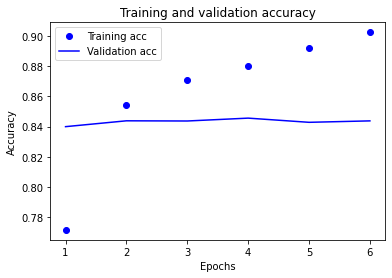

In [86]:
import matplotlib.pyplot as plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [87]:
import gensim

In [89]:
word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'

word2vec = gensim.models.Word2Vec.load(word2vec_path)


EOFError: Ran out of input

In [90]:
print(word2vec)
word2vec.w2v.most_similar("하늘")

<class 'gensim.models.word2vec.Word2Vec'>


AttributeError: type object 'Word2Vec' has no attribute 'w2v'

In [91]:
X_train,y_train,X_test,y_test,word_to_index = load_data(train_data,test_data,25000)

/tmp/ipykernel_3962/325033547.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/tmp/ipykernel_3962/325033547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/tmp/ipykernel_3962/325033547.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/tmp/ipykernel_3962/325033547.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [92]:
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2
word_to_index["<UNUSED>"] = 3

In [93]:

total_data_text = list(X_train)+list(X_test)

num_tokens = [len(token) for token in total_data_text]
num_tokens = np.array(num_tokens)

print("문장 길이의 평균 :", np.mean(num_tokens))
print("문장 길이의 최대 :", np.max(num_tokens))
print("문장 길이의 표준편차 :", np.std(num_tokens))

max_tokens = np.mean(num_tokens)+2*np.std(num_tokens)

maxlen = int(max_tokens)
print("전체 문장의 {}%가 maxlen값 이내에 포함됩니다.".format(np.sum(num_tokens<max_tokens)/len(num_tokens)))

문장 길이의 평균 : 13.718233430088207
문장 길이의 최대 : 83
문장 길이의 표준편차 : 11.469848902034261
전체 문장의 0.9340019146202243%가 maxlen값 이내에 포함됩니다.


In [94]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value = word_to_index["<PAD>"],
                                                        padding='pre',
                                                       maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                        value = word_to_index["<PAD>"],
                                                        padding='pre',
                                                       maxlen=maxlen)

In [95]:
X_val = X_train[:30000]
y_val = y_train[:30000]
X_train = X_train[30000:]
y_train = y_train[30000:]

In [96]:
vocab_size = 25000
word_vector_dim = 200
epochs = 4
embedding_matrix = np.random.rand(vocab_size,word_vector_dim)
#단어사전에 존재하는 단어별 워드 벡터를 복사합니다.
for i in range(vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]
print(index_to_word[4])        
print(embedding_matrix[4])
print(word2vec[index_to_word[4]])

KeyError: 0

In [97]:
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),
                                 input_length=maxlen, 
                                 trainable=True))
final_model.add(tf.keras.layers.LSTM(256))
final_model.add(tf.keras.layers.Dense(16,activation='relu'))
final_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [98]:
final_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

final_history = final_model.fit(X_train,
                           y_train,
                           epochs=epochs,
                           batch_size = 512,
                           validation_data=(X_val,y_val),
                           verbose = 1)

Epoch 1/4
227/227 [==============================] - 8s 29ms/step - loss: 0.5334 - accuracy: 0.7174 - val_loss: 0.3924 - val_accuracy: 0.8238
Epoch 2/4
227/227 [==============================] - 6s 28ms/step - loss: 0.3633 - accuracy: 0.8411 - val_loss: 0.3543 - val_accuracy: 0.8419
Epoch 3/4
227/227 [==============================] - 6s 28ms/step - loss: 0.3271 - accuracy: 0.8608 - val_loss: 0.3534 - val_accuracy: 0.8457
Epoch 4/4
227/227 [==============================] - 6s 28ms/step - loss: 0.2979 - accuracy: 0.8754 - val_loss: 0.3550 - val_accuracy: 0.8439


In [99]:
model_loss,model_acc = final_model.evaluate(X_test,y_test,verbose=2)
print("모델의 정확도는 {}% 입니다.".format(int(model_acc*100)))

1537/1537 - 3s - loss: 0.3661 - accuracy: 0.8407
모델의 정확도는 84% 입니다.


# 회고 
- 오늘 프로젝트동안 인상 깊었던 것은 LMS에서 패스푸드점을 예시로 든 비유와 gzip 오류입니다. 
- 오늘 가장 많이 만난 오류는 gzip과 관련된 오류였습니다. 대략 10번 이상은 만났습니다. 

stateful/stateless에 대해서 배우기 전,1. 같은 질문을 하는 음식점 직원과 계속해서 답변을 누적시켜 답변하는 손님을 비교했을 때, 일상에서의 상황을 생각하고 당연히 손님에게 문제가 있다고 생각했다.
2. 하지만 직원이 기억하지 못해 손님이 연속해서 누적된 답변을 하는 것을 알 수 있었다. 
3. 정확도를 높이기 위해 post 대신 pre를 사용했다. 대략 20%가 차이 난다고 한다. 

